In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 1 (10pts). Linear regression with one variable from scratch
# Using Jupyter notebook, load the data (ex1data1.csv). Visualize data using scatter plot.
# The first column is Population of City in 10,000s, and the second column is profit of food truck in 10,000.
# In order to predict the profit, fit the data using gradient descent method (without matrix). You need to calculate cost function and update weight using gradient descent method. Try several different learning rate. Please print Root Mean Squared Error (RMSE) after optimization.

In [3]:
dataFile = 'ex1data1.csv';
df = pd.read_csv(dataFile, header=None);

cols = ['pop', 'profit'];
df.columns = cols;
df.head()

,pop,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


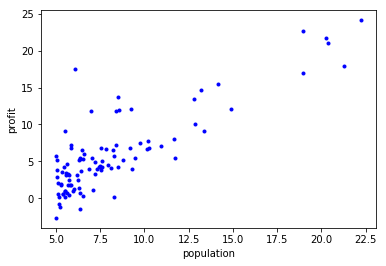

In [4]:
plt.plot(df['pop'], df['profit'], 'b.');
plt.ylabel('profit');
plt.xlabel('population');
plt.show()

In [5]:
def calCostFunc():
    res = 0;
    for i in range(m):
        j = w[0] + w[1] * df['pop'][i] - df['profit'][i];
        j = j*j;
        res += j;
    res = res/m;
    return res;

def updateW(alpha):
    for i in range(m):
        w[0] -= 2/m * alpha * (w[0] + w[1] * df['pop'][i] - df['profit'][i]);
        w[1] -= 2/m * alpha * df['pop'][i] * (w[0] + w[1] * df['pop'][i] - df['profit'][i]);


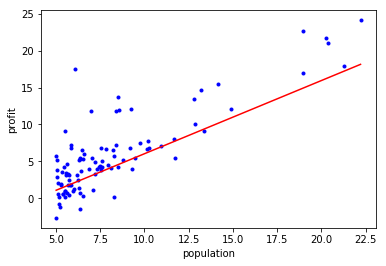

[-3.9248347944102067, 0.99468511947411553]
RMSE:  3.500205506451414


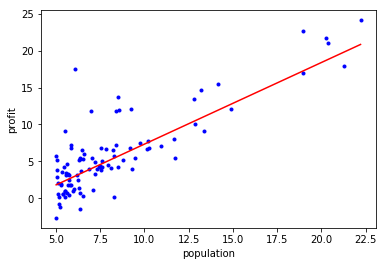

[-3.7640340661933571, 1.109051951540255]
RMSE:  3.0602076027931147


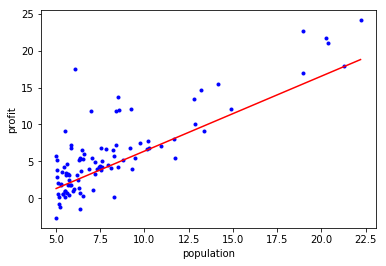

[-3.8103697082596515, 1.0187896200801272]
RMSE:  3.3451258135779383


In [6]:
m = df.shape[0];
alpha = [0.1, 0.01, 0.05];

for i in range(len(alpha)):
    w = [1, 1]
    prevCost = calCostFunc();
    while True:
        updateW(alpha[i]);
        cost = calCostFunc();
        if cost <= 0.001 or abs(prevCost - cost) <= 0.00001: break;
        prevCost = cost;

    minX = min(df['pop']);
    maxX = max(df['pop']);
    plt.plot(df['pop'], df['profit'], 'b.', [minX, maxX], [w[0] + w[1]*minX, w[0] + w[1]*maxX], 'r-');
    plt.ylabel('profit');
    plt.xlabel('population');

    plt.show();
    print(w);
    print('RMSE: ', math.sqrt(calCostFunc()));

In [7]:
# 2(30pts). Linear regression with multiple variables from scratch
# Using Jupyter notebook, load the data (ex1data2.csv). Visualize data.
# The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.
# In order to predict the housing price, fit the data using gradient descent method (without matrix). You need to calculate cost function and update weight using gradient descent method. Try several different learning rate. Please print the Root Mean Squared Error (RMSE) after optimization.
# 2-1. Linear regression with multiple variables using matrix
# Fit the data (ex1data2.csv) using matrix calculation. You need to calculate cost function and update weight. Please print the Root Mean Squared Error (RMSE) after optimization.
# 2-2. Linear regression with multiple variables using Normal equation
# Fit the data (ex1data2.csv) using Normal equation. You need to calculate cost function and update weight. Please print the best Root Mean Squared Error (RMSE) after optimization.

In [8]:
df1 = pd.read_csv('ex1data2.csv', header=None);
df1.columns = ['size', '#room', 'price'];
df1.head()

,size,#room,price
0,2104,3,399900.0
1,1600,3,329900.0
2,2400,3,369000.0
3,1416,2,232000.0
4,3000,4,539900.0


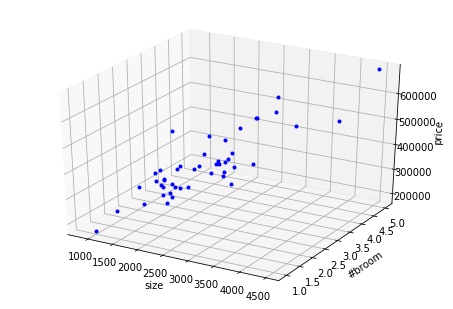

In [9]:
fig = plt.figure();
ax = Axes3D(fig);
ax.plot(df1['size'], df1['#room'], df1['price'], 'b.');
ax.set_xlabel('size');
ax.set_ylabel('#broom');
ax.set_zlabel('price');
plt.show();

### 2.1 Matrix method

In [10]:

def my_normalize():
    mean = ma.mean(axis=0);
    std = ma.std(axis=0);
    na = np.ndarray(shape=(df1.shape[0], 1));

    na.fill(mean[0]);
    na1 = np.ndarray(shape=(df1.shape[0], 1));
    na1.fill(mean[1]);
    finalMeanMatrix=np.concatenate((na, na1), axis=1);

    X=np.subtract(ma, finalMeanMatrix);
    x1 = np.split(X, 2, axis=1)[0]/std[0];
    x2 = np.split(X, 2, axis=1)[1]/std[1];
    X = np.concatenate((x1, x2), axis=1);
    return X;

In [11]:
# create X matrix and y vector
ma = df1.as_matrix(columns=['size', '#room']);
temp = my_normalize();
temp1 = np.ndarray(shape=(df1.shape[0], 1));
temp1.fill(1);
X = np.concatenate((temp1, temp), axis=1);
X_T = X.transpose();
y = df1.as_matrix(columns=['price']);
y_T = y.transpose();

In [12]:
def cost_func(a):
    a_T = a.transpose();
    t1 = np.dot(np.dot(np.dot(a_T, X_T), X), a);
    t2 = np.dot(np.dot(2*y_T, X), a);
    t3 = np.dot(y_T, y);
    t4 = np.add(np.subtract(t1, t2), t3);
    result = t4/m;
    return result;
#     return mean_squared_error(np.dot(X, a), y);

def updateMatrix(alpha, a):
    t1 = np.dot(np.dot(X_T, X), a);
    t2 = np.dot(X_T, y);
    temp = 2*alpha/m * np.subtract(t1, t2);
    a = np.subtract(a, temp);
    return a;

In [13]:
m = df1.shape[0];
alpha = [0.1, 0.01, 0.05];

for i in range(len(alpha)):
    a = np.ones(shape=(X.shape[1], 1));
    prevCost = cost_func(a);
    while True:
        a = updateMatrix(alpha[i], a);
        cost = cost_func(a);
        if cost <= 0.001 or abs(prevCost - cost) <= 0.0001: break;
        prevCost = cost;

    print(a);
    print('RMSE: ', math.sqrt(cost_func(a)));

[[ 340412.76595745]
 [ 109447.74027208]
 [  -6578.25154337]]
RMSE:  63926.21492616107
[[ 340412.76595743]
 [ 109447.66957881]
 [  -6578.18085011]]
RMSE:  63926.21492622006
[[ 340412.76595745]
 [ 109447.72503416]
 [  -6578.23630546]]
RMSE:  63926.214926167566


### 2.2 Normal equation

In [14]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X_T, X)), X_T), y);
print(w);
print('RMSE: ', math.sqrt(cost_func(w)));

[[ 340412.76595745]
 [ 109447.76551898]
 [  -6578.27679028]]
RMSE:  63926.214926156026


In [15]:
# 3(60pts). Linear regression with multiple variables
# Using Jupyter notebook, load the data (ex1data3.csv).
# This is California housing dataset. The original database is available from http://lib.stat.cmu.edu
# The data contains 20,640 observations on 9 variables. This dataset contains the average house value as target variable and the following input variables (features): average income, housing average age, average rooms, average bedrooms, population, average occupation, latitude, and longitude
# (R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,\nStatistics and Probability Letters, 33 (1997) 291-297) .
# 3-1. Linear regression with multiple variables using matrix
# Fit the data (ex1data3.csv) using matrix calculation. You need to calculate cost function and update weight. Please print the Root Mean Squared Error (RMSE) after optimization.
# 3-2. Linear regression with multiple variables using Normal equation
# Fit the data (ex1data3.csv) using Normal equation. You need to calculate cost function and update weight. Please print the best Root Mean Squared Error (RMSE) after optimization.
# 3-3. Linear regression with multiple variables using scikit-learn linear regression model
# Fit the data (ex1data3.csv) using linear regression from scikit-learn library. You need to calculate cost function and update weight.
# Please print the best Root Mean Squared Error (RMSE) after optimization.
# 3-4. Linear regression with multiple variables using TensorFlow
# Fit the data (ex1data3.csv)using linear regression using TensorFlow. Please do not use Normal equation TensorFlow. You need to calculate cost function and update weight.
# Please print the best Root Mean Squared Error (RMSE) after optimization.

In [16]:
df2 = pd.read_csv('ex1data3.csv');
df2 = df2.drop(columns=['Unnamed: 0']);
df2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 3.1 Matrix method

In [17]:
ma = df2.as_matrix();

y = ma[:,8:];
y_T = y.transpose();

ma = preprocessing.scale(ma, axis=0);

# create X, y
temp = np.ones(shape=(ma.shape[0], 1));
X = np.concatenate((temp, ma[:,0:8]), axis=1);
X_T = X.transpose();



In [18]:
m = df2.shape[0];
alpha = [0.1, 0.01, 0.05];

for i in range(len(alpha)):
    a = np.ones(shape=(X.shape[1], 1));
    prevCost = cost_func(a);
    while True:
        a = updateMatrix(alpha[i], a);
        cost = cost_func(a);
        if cost <= 0.001 or abs(prevCost - cost) <= 0.0001: break;
        prevCost = cost;
    print(a);
    print('RMSE: ', math.sqrt(cost_func(a)));

[[ 2.06855817]
 [ 0.88931066]
 [ 0.13929766]
 [-0.36080835]
 [ 0.37679141]
 [ 0.00219653]
 [-0.04233705]
 [-0.69405879]
 [-0.67081511]]
RMSE:  0.7274312794554385
[[ 2.06855816]
 [ 0.93995808]
 [ 0.18856558]
 [-0.38211384]
 [ 0.36169779]
 [ 0.01946372]
 [-0.04758506]
 [-0.28737054]
 [-0.2664233 ]]
RMSE:  0.7527198608444047
[[ 2.06855817]
 [ 0.90492092]
 [ 0.14908045]
 [-0.3774783 ]
 [ 0.38493668]
 [ 0.00555274]
 [-0.04349744]
 [-0.60808662]
 [-0.58603945]]
RMSE:  0.7306311201537952


### 3.2 Normal equation

In [19]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X_T, X)), X_T), y);
print(w);
print('RMSE: ', math.sqrt(cost_func(w)));

[[ 2.06855817]
 [ 0.8296193 ]
 [ 0.11875165]
 [-0.26552688]
 [ 0.30569623]
 [-0.004503  ]
 [-0.03932627]
 [-0.89988565]
 [-0.870541  ]]
RMSE:  0.7241001216576475


### 3.3 Sklearn linear regression

In [20]:
Lin_reg = LinearRegression();
Lin_reg.fit(X, y);
Lin_reg.coef_[0][0] = Lin_reg.intercept_[0];
print(Lin_reg.coef_.transpose());
print('RMSE: ', math.sqrt(cost_func(Lin_reg.coef_.transpose())));

[[ 2.06855817]
 [ 0.8296193 ]
 [ 0.11875165]
 [-0.26552688]
 [ 0.30569623]
 [-0.004503  ]
 [-0.03932627]
 [-0.89988565]
 [-0.870541  ]]
RMSE:  0.7241001216576489


### 3.4 Tensorflow linear regression

In [21]:
for i in range(len(alpha)):
    W = tf.Variable(tf.zeros([8,1]));
    b = tf.Variable(tf.zeros([1]));

    X1= X.astype(np.float32);
    pred = tf.matmul(X1[:,1:], W) + b;

    cost = tf.reduce_mean(tf.square(pred - y));
    optimizer = tf.train.GradientDescentOptimizer(alpha[i]).minimize(cost);
    init = tf.global_variables_initializer();

    with tf.Session() as sess:
        sess.run(init);
        for _ in range(5000):
            sess.run(optimizer);

        print(sess.run(b));        
        print(sess.run(W));
        print('RMSE: ', math.sqrt(sess.run(cost)));

[ 2.06855774]
[[ 0.82962048]
 [ 0.11875186]
 [-0.26552892]
 [ 0.30569792]
 [-0.00450296]
 [-0.03932633]
 [-0.89988297]
 [-0.87053841]]
RMSE:  0.7240996920303261
[ 2.06855249]
[[ 0.8308593 ]
 [ 0.11902019]
 [-0.26780158]
 [ 0.30754754]
 [-0.0044214 ]
 [-0.03937544]
 [-0.89676428]
 [-0.86756068]]
RMSE:  0.7241003505542097
[ 2.06855726]
[[ 0.82962197]
 [ 0.11875214]
 [-0.26553151]
 [ 0.30570003]
 [-0.00450286]
 [-0.03932638]
 [-0.89987975]
 [-0.87053537]]
RMSE:  0.7240997331880864
